In [2]:
# This script allows to visualize the results of the generated labels

import sys, os

import matplotlib.pyplot as plt

In [3]:
# all generated images used, 1 per sequence and cam, no matter how many labels were generated
# - Good: 34
# - Low IoU: 5
# - Missed but nearby label exists:  6
# - Missed: 14
# - False Positive: 1

# Snowy1 (2022_01) + Snowy2 individual images: 

# - Good:  22
# - Low IoU: 4
# - Missed:  12
# - Missed but nearby label exists:  4
# - False Positive:i 1
results_all_images_used_labels_prev = {
    "Good": 34,
    "Low IoU": 5,
    "Missed but nearby label exists": 6,
    "Missed": 14,
    "False Positive": 1
} # 34 / 60 = 56% accuracy

results_all_images_used_images_prev = {
    "Good": 22,
    "Low IoU": 4,
    "Missed": 12,
    "Missed but nearby label exists": 4,
    "False Positive": 1
} # 22 / 43 = 51% accuracy

# all generated images used, 1 per sequence and cam, median, num_shared_features = 3
# Final results_labels:  {'Good': 29, 'Low IoU': 11, 'Missed some objects': 20, 'Missed but nearby label exists': 4, 'False Positive': 3}}
# Final results_images:  {'Good': 16, 'Low IoU': 5, 'Missed some objects': 16, 'Missed but nearby label exists': 4, 'False Positive': 2}}


results_all_images_used_labels = {'Good': 29, 'Low IoU': 11, 'Missed': 20, 'Missed but nearby label exists': 4, 'False Positive': 3}
# 28 / 60 = 47% accuracy
results_all_images_used_images ={'Good': 16, 'Low IoU': 5, 'Missed': 16, 'Missed but nearby label exists': 4, 'False Positive': 2}
# 16 / 43 = 37% accuracy


# same number of annotations in source and target labels, 1 img per sequence and cam
# - Good: 20
# - Low IoU: 4
# - Missed but nearby label exists:  4
# - Missed: 3
# - False Positive:

# Snowy1 (2022_01) + Snowy2 individual images: 

# - Good:  15
# - Low IoU: 4
# - Missed:  2
# - Missed but nearby label exists:  3
# - False Positive:

results_same_num_annotations_labels_prev = {
    "Good": 20,
    "Low IoU": 4,
    "Missed but nearby label exists": 4,
    "Missed": 3,
    "False Positive": 0
}
# num shared_features = 3, 1 img per sequence and cam, median
results_same_num_annotations_labels = {'Good': 19, 'Low IoU': 5, 'Missed': 3, 'Missed but nearby label exists': 3, 'False Positive': 1}
# 19 / 34 = 56% accuracy

results_same_num_annotations_images_prev = {
    "Good": 15,
    "Low IoU": 4,
    "Missed": 2,
    "Missed but nearby label exists": 3,
    "False Positive": 0
}

results_same_num_annotations_images = {'Good': 14, 'Low IoU': 4, 'Missed': 2, 'Missed but nearby label exists': 3, 'False Positive': 1}
# 14 / 23 = 61% accuracy

# cam 5 only, num_shared_features = 3, 1 image per sequence, median
# Final results_labels:  {'Good': 13, 'Low IoU': 1, 'Missed some objects': 0, 'Missed but nearby label exists': 3, 'False Positive': 1}
# Final results_images:  {'Good': 10, 'Low IoU': 1, 'Missed some objects': 0, 'Missed but nearby label exists': 3, 'False Positive': 1}


results_cam5_labels = {'Good': 13, 'Low IoU': 1, 'Missed': 0, 'Missed but nearby label exists': 3, 'False Positive': 1}
# 13 / 18 = 72% accuracy
results_cam5_images = {'Good': 10, 'Low IoU': 1, 'Missed': 0, 'Missed but nearby label exists': 3, 'False Positive': 1}
# 10 / 14 = 71% accuracy



results {'Good': 29, 'Low IoU': 11, 'Missed': 20, 'Missed but nearby label exists': 4, 'False Positive': 3}


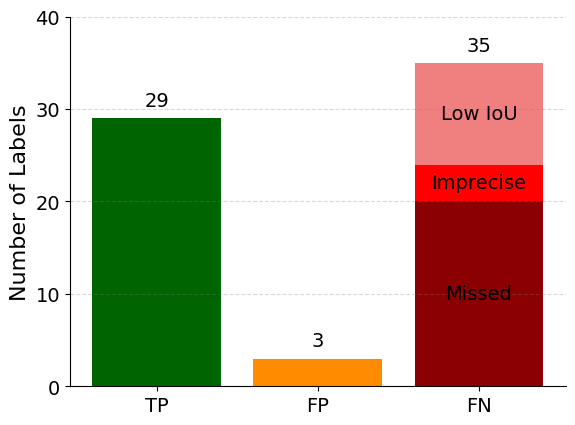

results {'Good': 19, 'Low IoU': 5, 'Missed': 3, 'Missed but nearby label exists': 3, 'False Positive': 1}


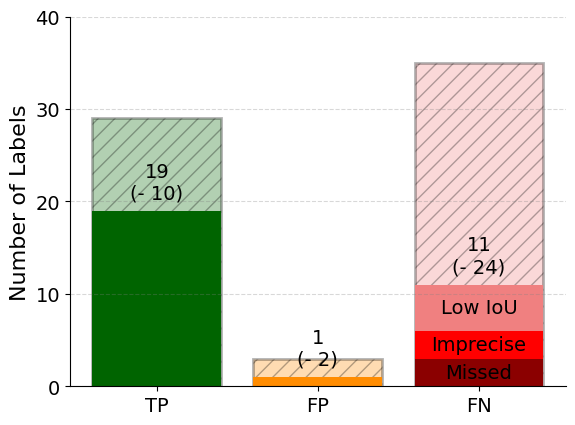

results {'Good': 13, 'Low IoU': 1, 'Missed': 0, 'Missed but nearby label exists': 3, 'False Positive': 1}


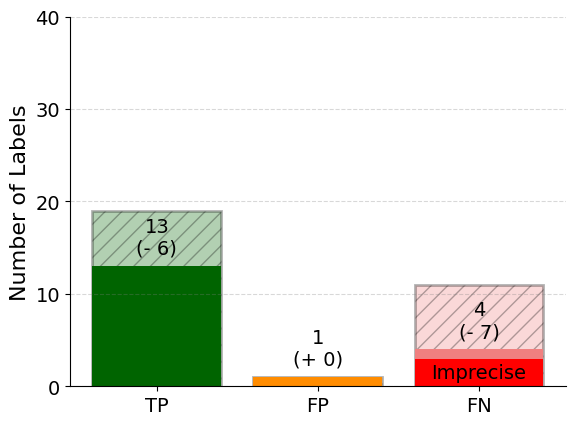

Success rate all images used labels:  0.43283582089552236
Success rate all images used images:  0.37209302325581395
Success rate same num annotations labels:  0.6129032258064516
Success rate same num annotations images:  0.5833333333333334
Success rate cam5 labels:  0.7222222222222222
Success rate cam5 images:  0.6666666666666666
Improvement labels:  0.18006740491092926
Improvement images:  0.21124031007751942
Improvement labels:  0.10931899641577059
Improvement images:  0.08333333333333326


In [13]:
def plot_results(results, y_axis_descr, save_path=None, results_baseline=None):
    result_supercategories = combine_to_tp_fp_fn(results)
    # plot the results
    fig, ax = plt.subplots()
    # also plot the baseline results superimposed
    if results_baseline is not None: # alpha = 0.3
        result_baseline_supercategories = combine_to_tp_fp_fn(results_baseline)
        ax.bar(result_baseline_supercategories.keys(), result_baseline_supercategories.values(), alpha=0.3, hatch='//', color='white', edgecolor='black', linewidth=2, label='baseline', width=0.8)
    # ax.bar(result_supercategories.keys(), result_supercategories.values())

    # show the categories of FN (Missed, Missed but nearby label exists, Low IoU) as part of the column of FN
    # ax.bar(result_supercategories.keys(), result_supercategories.values())
    print("results", results)
    for i, (cat_name, val) in enumerate(result_supercategories.items()):
        ax.bar(i, val, width=0.8, color='blue', label=cat_name)
        if i == 2:
            # Divide the third column into three parts with the sizes of the sub categories
            # sub_categories = ["Missed", "Missed but nearby label exists", "Low IoU"]
            sub_categories_to_official_names = {
                "Missed": "Missed",
                "Missed but nearby label exists": "Imprecise",
                "Low IoU": "Low IoU"
            }
            # sub_categories_values = [v for k, v in results.items() if k in sub_categories_to_official_names.keys()]
            # use different red shades for the sub categories
            sub_category_colors = ['darkred', 'red', 'lightcoral']
            offset = 0
            for j, sub_cat in enumerate(sub_categories_to_official_names.keys()):
                ax.bar(i, results[sub_cat], 0.8, color=sub_category_colors[j], bottom=offset)
                offset += results[sub_cat]
                # ax.bar(i, sub_categories_values[j], 0.8, color=sub_category_colors[j], bottom=offset)
                # offset += sub_categories_values[j]      

                # draw the subcategory names in the middle of the subcategory, if the subcategory is not too small
                if results[sub_cat] > 1:
                    sub_cat_name = sub_categories_to_official_names[sub_cat] # + "\n(" + str(results[sub_cat]) + ")"
                    ax.text(i, offset - results[sub_cat]/2, sub_cat_name, color='black', ha='center', fontsize=14, verticalalignment='center')

            # ax.bar(2, results[sub_categories[0]], 0.8, color='yellow', bottom=0, label=sub_categories[0])
            # ax.bar(2, results[sub_categories[1]], 0.8, color='orange', bottom=results[sub_categories[0]], label=sub_categories[1])
            # ax.bar(2, results[sub_categories[2]], 0.8, color='purple', bottom=results[sub_categories[0]] + results[sub_categories[1]], label=sub_categories[2])
            # ax.bar(2, 0.3, 0.8, color='orange', bottom=0.4, label='Part 2')
            # ax.bar(2, 0.3, 0.8, color='purple', bottom=0.7, label='Part 3')

        # ax.bar(i, result_supercategories[cat], width=0.8, color='blue', label='Column 1')
    sub_categories = ["Missed", "Missed but nearby label exists", "Low IoU"]
    offset = 0
    # for i, cat in enumerate(sub_categories):
        # draw the sub categories on top of the FN column, from offset to offset + value

    # # Divide the third column into three parts
    # ax.bar(x[2], 1, width, color='green', label='Column 3')
    # ax.bar(x[2], 0.4, width, color='yellow', bottom=0, label='Part 1')
    # ax.bar(x[2], 0.3, width, color='orange', bottom=0.4, label='Part 2')
    # ax.bar(x[2], 0.3, width, color='purple', bottom=0.7, label='Part 3')
        


    # ax.set_title(title, fontsize=16)

    # set the fonsizes of the labels
    ax.tick_params(axis='x', labelsize=14)
    # use ["TP", "FP", "FN"] as labels
    ax.set_xticks(range(0, 3))
    ax.set_xticklabels(["TP", "FP", "FN"])
    # ax.set_xticklabels(result_supercategories.keys())
    # set the y axis to every 10th number
    ax.set_yticks(range(0, 41, 10))
    ax.tick_params(axis='y', labelsize=14)
    ax.set_ylabel(y_axis_descr, fontsize=16)

    # let the diagram look more professional
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # add horizontal lines at 10, 20, 30 and 40
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.3) # 0.25

    # set the limit of the y axis to 50
    ax.set_ylim([0, 40])

    offset = 0
    if results_baseline is not None:
        ax.patches[0].set_facecolor('darkgreen')
        ax.patches[1].set_facecolor('darkorange')
        ax.patches[2].set_facecolor("lightcoral") # 'darkred')
        # ax.patches[0].set_facecolor('grey')
        # ax.patches[1].set_facecolor('grey')
        # ax.patches[2].set_facecolor('grey')
        offset = 3
    
    # color the tp dark green, fp dark red and fn dark orange
    ax.patches[offset + 0].set_facecolor('darkgreen')
    ax.patches[offset + 1].set_facecolor('darkorange')
    ax.patches[offset + 2].set_facecolor('darkred')

    # add the numbers to the bars
    for i, (k, v) in enumerate(result_supercategories.items()):
        # ax.text(i - 0.05, v + 0.5, str(v))
        # center the text in the middle of the bar
        bar_text = str(v)
        if results_baseline is not None:
            diff = v - result_baseline_supercategories[k]
            sign = "+ " if diff >= 0 else "- "
            bar_text += "\n(" + sign + str(abs(diff)) + ")"
        
        ax.text(i, v + 1.3, bar_text, color='black', ha='center', fontsize=14)

        # add a remark that the difference is compared to the baseline
        # if results_baseline is not None:
        #     ax.text(0.5, 0.5, "* compared to baseline", color='black', ha='center', transform=ax.transAxes)

    plt.show()
    if save_path is not None:
        # check if the folder exists
        folder = os.path.dirname(save_path)
        if not os.path.exists(folder):
            os.makedirs(folder)
        fig.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi=300)

def combine_categories(results, cat1, cat2, new_title):
    # combine two categories into one
    results[new_title] = results[cat1] + results[cat2]
    del results[cat1]
    del results[cat2]

categorie_to_titles = {
    "Good": "TP",
    "Low IoU": "Low IoU",
    "Missed": "FN",
    "False Positive": "FP",
    "Missed but nearby label exists": "Missed but nearby label exists",
    "Missed": "Missed"
}

def combine_to_tp_fp_fn(results):
    # combine all categories into TP, FP and FN
    tp = 0
    fp = 0
    fn = 0
    for cat in results:
        if cat == "Good":
            tp += results[cat]
        elif cat == "False Positive":
            fp += results[cat]
        elif cat == "Missed" or cat == "Missed but nearby label exists" or cat == "Low IoU":
            fn += results[cat]
        else:
            print("ERROR: unknown category: ", cat)

    # TODO: PARETO FRONT

    new_results = {}
    new_results["TP"] = tp
    new_results["FP"] = fp
    new_results["FN"] = fn
    return new_results
    # for cat in results:
    #     if cat != "TP" and cat != "FP" and cat != "FN":
    #         del results[cat]

# TODO: different colors for Missed and Low IoU or Missed but nearby label exists

def calc_success_rate(results):
    # calculate the success rate
    sum_of_values = sum(results.values())
    success_rate = results["Good"] / sum_of_values
    return success_rate

# results_all_labels = combine_to_tp_fp_fn(results_all_images_used_labels)
plot_results(results_all_images_used_labels, "Number of Labels", "../outputs/plots/AllImages_labels.pdf")
# plot_results(results_all_images_used_images, "Number of Images", "../outputs/plots/AllImages_images.pdf")
plot_results(results_same_num_annotations_labels, "Number of Labels", "../outputs/plots/SameNumLabels_labels.pdf", results_all_images_used_labels)
# plot_results(results_same_num_annotations_images, "Number of Images", "../outputs/plots/SameNumLabels_images.pdf", results_all_images_used_images)
plot_results(results_cam5_labels, "Number of Labels", "../outputs/plots/Cam5_labels.pdf", results_same_num_annotations_labels)
# plot_results(results_cam5_images, "Number of Images", "../outputs/plots/Cam5_images.pdf", results_same_num_annotations_images)

print("Success rate all images used labels: ", calc_success_rate(results_all_images_used_labels))
print("Success rate all images used images: ", calc_success_rate(results_all_images_used_images))
print("Success rate same num annotations labels: ", calc_success_rate(results_same_num_annotations_labels))
print("Success rate same num annotations images: ", calc_success_rate(results_same_num_annotations_images))

print("Success rate cam5 labels: ", calc_success_rate(results_cam5_labels))
print("Success rate cam5 images: ", calc_success_rate(results_cam5_images))

print("Improvement labels: ", calc_success_rate(results_same_num_annotations_labels) - calc_success_rate(results_all_images_used_labels))
print("Improvement images: ", calc_success_rate(results_same_num_annotations_images) - calc_success_rate(results_all_images_used_images))
# print("Improvement labels in percent", calc_success_rate(results_same_num_annotations_labels) / calc_success_rate(results_all_images_used_labels) - 1)
# print("Improvement images in percent", calc_success_rate(results_same_num_annotations_images) / calc_success_rate(results_all_images_used_images) - 1)

print("Improvement labels: ", calc_success_rate(results_cam5_labels) - calc_success_rate(results_same_num_annotations_labels))
print("Improvement images: ", calc_success_rate(results_cam5_images) - calc_success_rate(results_same_num_annotations_images))
# print("Improvement images in percent", calc_success_rate(results_cam5_images) / calc_success_rate(results_same_num_annotations_images) - 1)
